In [158]:
using Random, LinearAlgebra, StatsPlots, Statistics, LaTeXStrings, Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1242


In [2]:
function buildCollection(N)
    return [0 for _ in 1:N]
end

function sample(N, collection)
    s = rand(1:N)
    collection[s] = collection[s] | 1
end

function count(N, collection)
    c = 0
    for i in 1:N
        c = c + collection[i]
    end
    return c
end

count (generic function with 1 method)

In [179]:
# Collection sizes
Collections = [10, 30, 50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
#Collections = Array([10, 30, 50, 70])

# Number of t0rials for each case
N = 200

# Save the results
R = Array{Float64}(undef, N, size(Collections)[1])
 
i = 1
for c in Collections
    print("Tamaño:", c)
    for n in 1:N
        collection = buildCollection(c)
        iter = 0
        while  count(c, collection) != c
            sample(c, collection)
            iter = iter + 1
        end
        R[n, i] = iter
    end
    i += 1
end
    

Tamaño:10Tamaño:30Tamaño:50Tamaño:100Tamaño:150Tamaño:200Tamaño:300Tamaño:400Tamaño:500Tamaño:600Tamaño:700Tamaño:800Tamaño:900Tamaño:1000

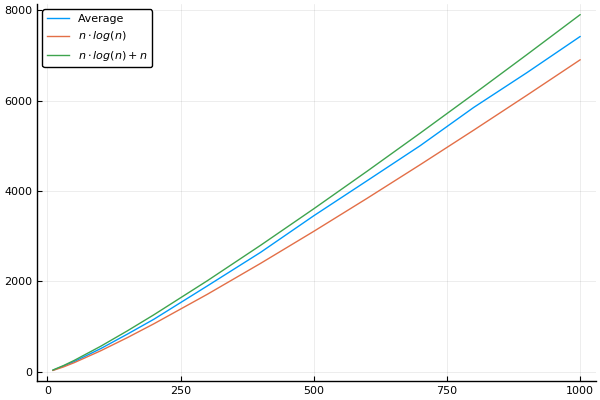

In [181]:
pyplot()
plot(Collections, dropdims(mean(R, dims=1),dims=1), label="Average")
plot!(Collections, [n * log(n) for n in Collections], label=L"n\cdot log(n)")
plot!(Collections, [n * log(n) + n for n in Collections], label=L"n\cdot log(n) + n")

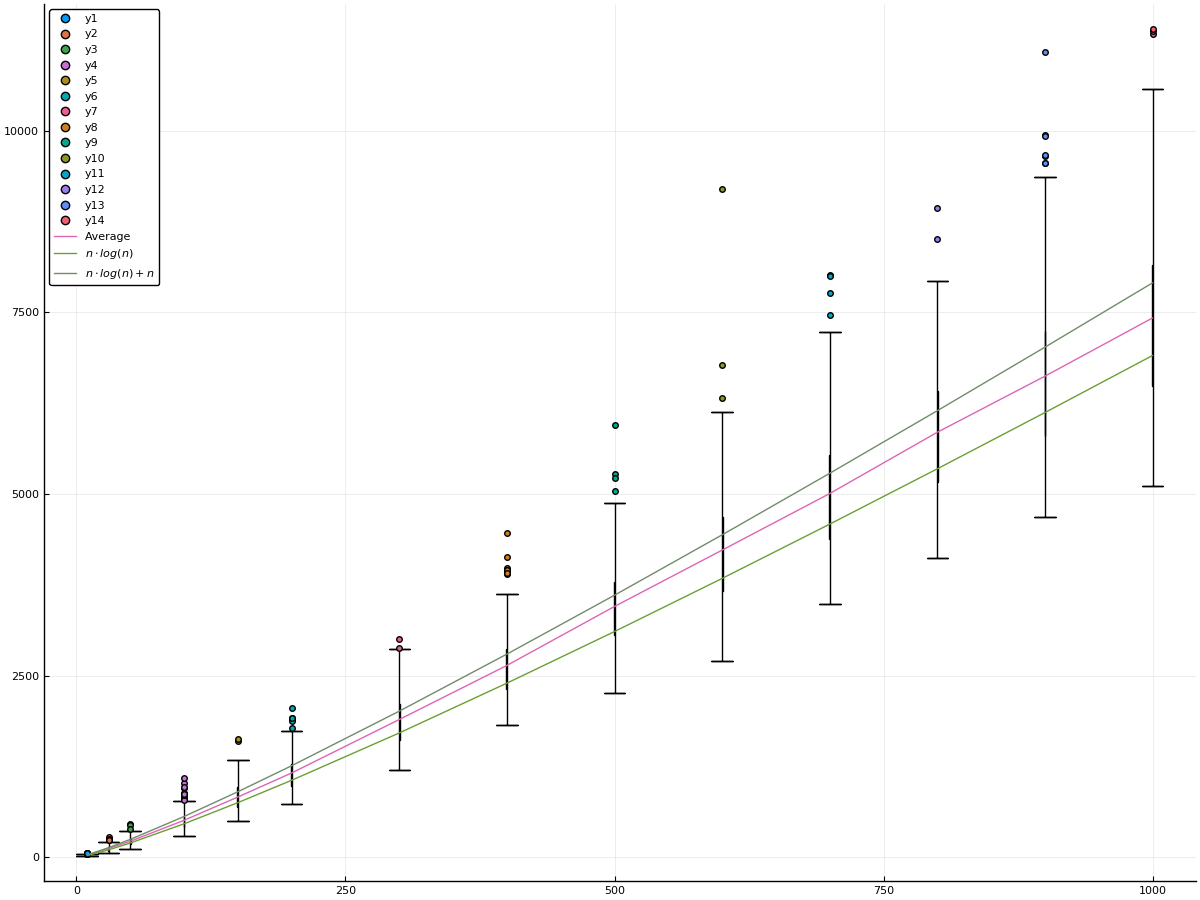

In [210]:
boxplot(Collections', R, whisker_width=20, size=(1200, 900))
plot!(Collections, dropdims(mean(R, dims=1),dims=1), label="Average")
plot!(Collections, [n * log(n) for n in Collections], label=L"n\cdot log(n)")
plot!(Collections, [n * log(n) + n for n in Collections], label=L"n\cdot log(n) + n")
#plot!(Collections', [r + randn() * 10 for r in R])